In [58]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.version)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.9/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tensorflow/Graduate Admission/Admission_Predict_Ver1.1.csv')


In [ ]:
tensor1 = tf.ones([1,2,3])
print(tensor1)
a = np.array([1, 2, 3])
b = tf.constant(a)
a[0] = 4

with tf.compat.v1.Session() as sess:
  print(b.numpy())
print(b)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
[1 2 3]
tf.Tensor([1 2 3], shape=(3,), dtype=int64)


In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


In [ ]:
numeric_columns = X.columns

feature_columns = []
for feature_name in numeric_columns:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[NumericColumn(key='GRE Score', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='TOEFL Score', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='University Rating', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SOP', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='LOR ', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='CGPA', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Research', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
def make_input_fn(data_df, label_df,num_epochs=10,shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(X_train,y_train)
eval_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)

In [ ]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

print(result)

{'average_loss': 0.008971088, 'label/mean': 0.71839994, 'loss': 0.008971088, 'prediction/mean': 0.70319664, 'global_step': 150}


In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))

for i in range(len(pred_dicts)):
  print(df.iloc[i])
  print(pred_dicts[i]['predictions'])
  print('-------------------------------')


Serial No.             1.00
GRE Score            337.00
TOEFL Score          118.00
University Rating      4.00
SOP                    4.50
LOR                    4.50
CGPA                   9.65
Research               1.00
Chance of Admit        0.92
Name: 0, dtype: float64
[0.66140234]
-------------------------------
Serial No.             2.00
GRE Score            324.00
TOEFL Score          107.00
University Rating      4.00
SOP                    4.00
LOR                    4.50
CGPA                   8.87
Research               1.00
Chance of Admit        0.76
Name: 1, dtype: float64
[0.6979179]
-------------------------------
Serial No.             3.00
GRE Score            316.00
TOEFL Score          104.00
University Rating      3.00
SOP                    3.00
LOR                    3.50
CGPA                   8.00
Research               1.00
Chance of Admit        0.72
Name: 2, dtype: float64
[0.66196084]
-------------------------------
Serial No.             4.00
GRE Score 


**Example 2**

Dataset: Auto-mpg dataset.


Goal: Predict fuel prices



In [59]:
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [77]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [78]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [79]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


Data Cleaning

In [90]:
df = raw_dataset.copy()
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [91]:
df.isna().sum()
df = df.dropna()

In [92]:
df['Origin'] = df['Origin'].map({1:'USA',2:'Europe',3:'Japan'})
df.head()



,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [93]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')


In [94]:
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [97]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

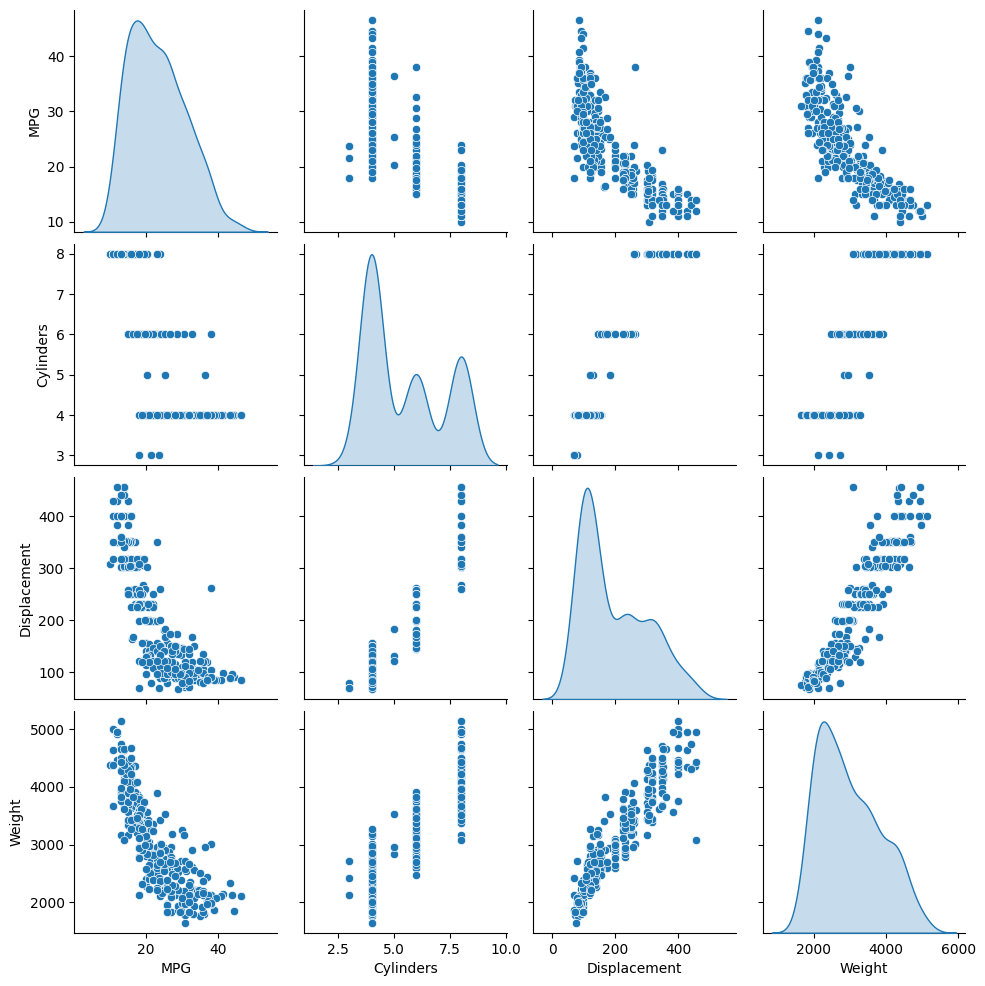

In [98]:
sns.pairplot(train_df[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [99]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [103]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')


In [104]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]


First Trying Regression with 1 Column ('Horsepower')

In [106]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,],axis=None)
horsepower_normalizer.adapt(horsepower)
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [107]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 84ms/step


array([[ 1.27671   ],
       [ 0.7210509 ],
       [-2.3564458 ],
       [ 1.7896262 ],
       [ 1.6186541 ],
       [ 0.63556486],
       [ 1.9178551 ],
       [ 1.6186541 ],
       [ 0.42184982],
       [ 0.7210509 ]], dtype=float32)

In [109]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [110]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2
)

Epoch 1/100
8/8 [==============================] - 1s 56ms/step - loss: 22.8678 - val_loss: 22.9299
Epoch 2/100
8/8 [==============================] - 0s 21ms/step - loss: 22.0633 - val_loss: 22.1299
Epoch 3/100
8/8 [==============================] - 0s 22ms/step - loss: 21.2634 - val_loss: 21.3298
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 20.4627 - val_loss: 20.5298
Epoch 5/100
8/8 [==============================] - 0s 18ms/step - loss: 19.6648 - val_loss: 19.7300
Epoch 6/100
8/8 [==============================] - 0s 18ms/step - loss: 18.8631 - val_loss: 18.9299
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 18.0632 - val_loss: 18.1299
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 17.2639 - val_loss: 17.3297
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 16.4632 - val_loss: 16.5298
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 15.6630 - val_loss: 15.7298
Epo

In [114]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804850,4.202663,95
96,3.805203,4.181102,96
97,3.806299,4.210064,97
98,3.806858,4.204631,98
99,3.801344,4.181316,99


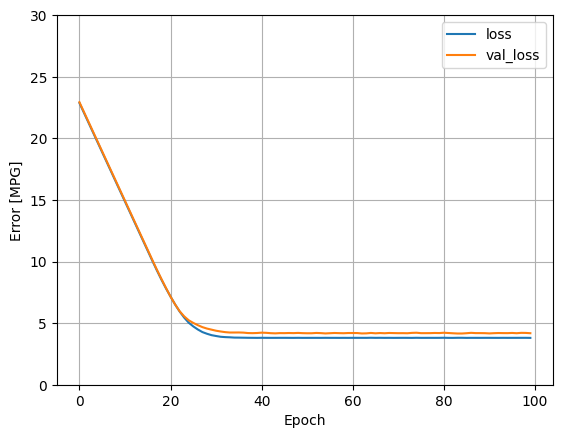

In [115]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,30])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


In [116]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, 
    verbose=1
)

3/3 [==============================] - 0s 6ms/step - loss: 3.6466


8/8 [==============================] - 0s 2ms/step


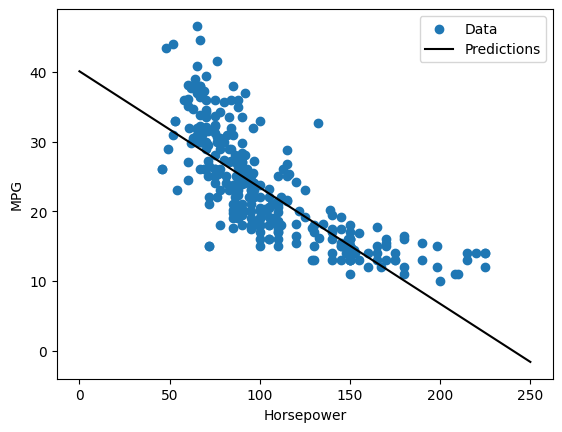

In [117]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()
plot_horsepower(x, y)

Predicting using multiple inputs

In [119]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [122]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [123]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 48ms/step - loss: 22.9502 - val_loss: 23.1112
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 22.0170 - val_loss: 22.3755
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 21.2005 - val_loss: 21.6711
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 20.4003 - val_loss: 20.9743
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 19.5675 - val_loss: 20.2324
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 18.7807 - val_loss: 19.5425
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 17.9140 - val_loss: 18.8302
Epoch 8/100
8/8 [==============================] - 0s 12ms/step - loss: 17.0965 - val_loss: 18.1119
Epoch 9/100
8/8 [==============================] - 0s 13ms/step - loss: 16.2750 - val_loss: 17.3785
Epoch 10/100
8/8 [==============================] - 0s 12ms/step - loss: 15.4608 - val_loss: 16.6646

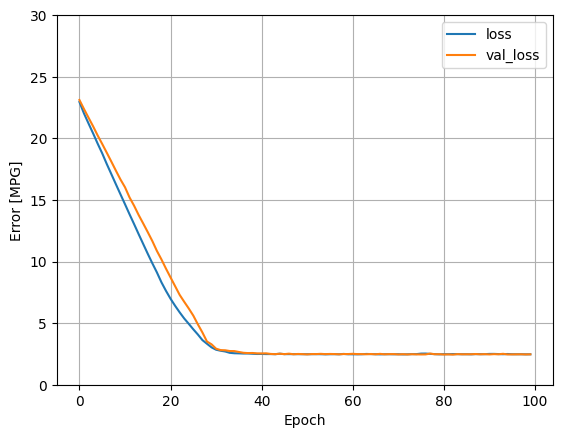

In [124]:
plot_loss(history)

In [126]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 2.4638


Adding dense layers

In [127]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

Working with 1 feautre

In [129]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [130]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.78 s, sys: 192 ms, total: 6.97 s
Wall time: 7.53 s


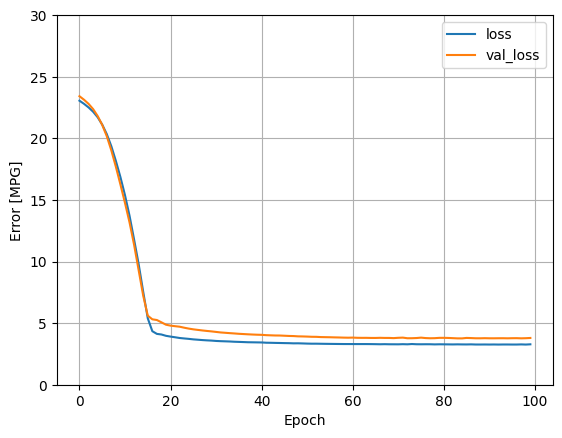

In [131]:
plot_loss(history)

8/8 [==============================] - 0s 2ms/step


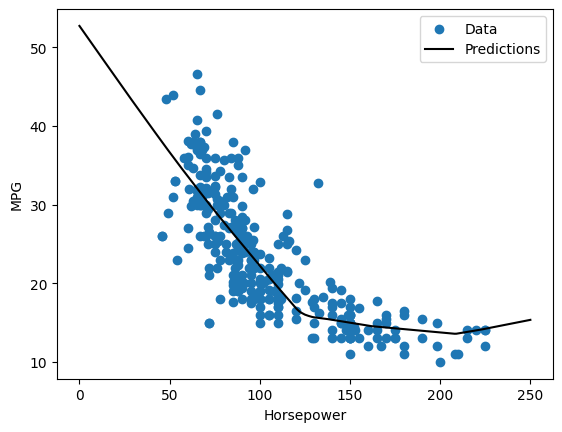

In [132]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)
plot_horsepower(x, y)

In [133]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

Multiple features + DNN

In [134]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_9 (Dense)             (None, 64)                640       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [135]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.05 s, sys: 197 ms, total: 6.25 s
Wall time: 11.5 s


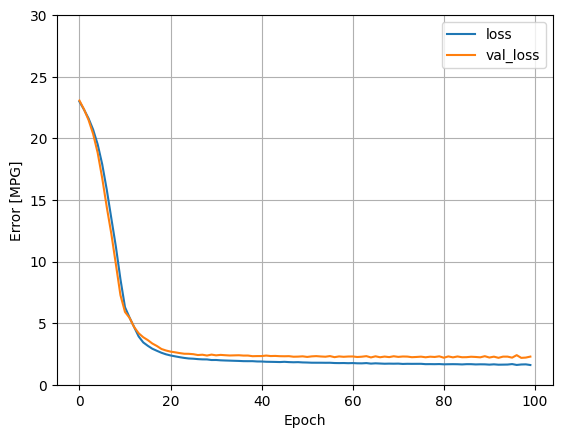

In [136]:
plot_loss(history)

In [137]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

Results

In [138]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.646624
linear_model,2.463765
dnn_horsepower_model,2.894259
dnn_model,1.745981


3/3 [==============================] - 0s 8ms/step


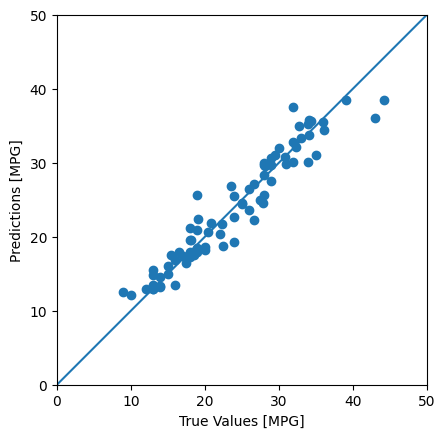

In [139]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

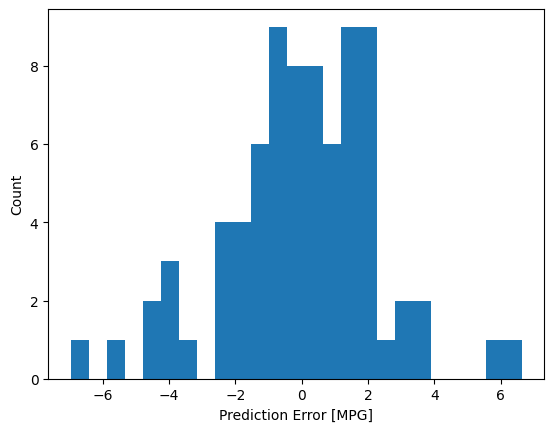

In [140]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [141]:
dnn_model.save('dnn_model')

In [142]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)